In [2]:
import pandas as pd
import statsmodels.api as sm

date_columns = [
'Defendant_Date_of_Birth',
'Case_Trial_Date',
'Charged_Offense_Date',
'Arraigned_Offense_Date',
'Year'
]

df = pd.read_csv('./data/cleaned/3drugs_cleaned.csv', low_memory=False, infer_datetime_format=True, parse_dates=date_columns)

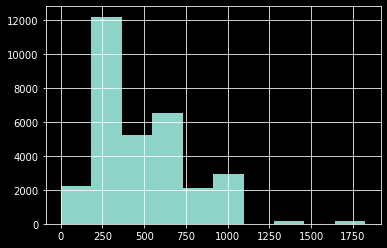

In [3]:
df.Probation_in_Days.hist()

In [4]:
probation = pd.concat([pd.get_dummies(df['Plea_Code']), df['Probation_in_Days'], pd.get_dummies(df['County']), pd.get_dummies(df['Defendant_Sex_Code']), df['Age'], pd.get_dummies(df['District_Court_Attorney_Type']), pd.get_dummies(df['Defendant_Race_Code'])], axis=1)
probation.fillna(0, inplace=True)

X = probation.drop('Probation_in_Days', axis=1)
X = sm.add_constant(X)
Y = probation['Probation_in_Days']
model = sm.OLS(Y, X)
results = model.fit()
results.summary2()
# dir(results)

/Users/jacklm/Documents/UNC/POLI 490H/poli490h/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:       0.265       
Dependent Variable:     Probation_in_Days   AIC:                  5414183.8533
Date:                   2019-11-18 17:05    BIC:                  5415509.8822
No. Observations:       424606              Log-Likelihood:       -2.7070e+06 
Df Model:               120                 F-statistic:          1276.       
Df Residuals:           424485              Prob (F-statistic):   0.00        
R-squared:              0.265               Scale:                20189.      
------------------------------------------------------------------------------
                            Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------------
const                       -0.0000  26.8524  -0.0000 1.0000 -52.6299  52.6299
Guilty                     186.2119   0.6187 300.9632 0.0000 184.9993 187.4246
Guilty Alford Plea         294.6911   2.3504 125.3813 0.0000 290.0845 299.2977
Guilty to Lesser           305.6887   1.3233 231.0000 0.0000 303.0950 308.2824
No Contest                 249.4073   3.9058  63.8551 0.0000 241.7520 257.0626
Not Guilty                  75.8625   2.6173  28.9853 0.0000  70.7327  80.9923
Responsible to Lesser       -0.4782  23.6995  -0.0202 0.9839 -46.9285  45.9720
ALAMANCE                    -0.2994   1.9297  -0.1551 0.8767  -4.0815   3.4827
ALEXANDER                   -3.3420   6.3690  -0.5247 0.5998 -15.8250   9.1410
ALLEGHANY                   29.4045   9.1242   3.2227 0.0013  11.5214  47.2876
ANSON                       -2.0408   3.9233  -0.5202 0.6029  -9.7305   5.6488
ASHE                       -37.2140   7.3215  -5.0829 0.0000 -51.5639 -22.8641
AVERY                        2.5108   5.2362   0.4795 0.6316  -7.7519  12.7735
BEAUFORT                    12.7400   2.5925   4.9141 0.0000   7.6587  17.8213
BERTIE                       1.8789   5.2171   0.3601 0.7187  -8.3464  12.1042
BLADEN                      12.3868   3.6318   3.4106 0.0006   5.2686  19.5051
BRUNSWICK                   -2.1030   1.6897  -1.2446 0.2133  -5.4147   1.2088
BUNCOMBE                   -25.3621   2.0019 -12.6691 0.0000 -29.2858 -21.4385
BURKE                       10.3264   3.6561   2.8244 0.0047   3.1605  17.4923
CABARRUS                   -13.6179   1.8435  -7.3869 0.0000 -17.2311 -10.0046
CALDWELL                    -0.7018   3.7848  -0.1854 0.8529  -8.1198   6.7162
CAMDEN                      23.8093   9.5092   2.5038 0.0123   5.1715  42.4471
CARTERET                    22.8778   2.0450  11.1870 0.0000  18.8696  26.8861
CASWELL                      0.6753   6.1270   0.1102 0.9122 -11.3333  12.6840
CATAWBA                     -3.6468   1.9315  -1.8881 0.0590  -7.4324   0.1388
CHATHAM                     -9.7131   3.7390  -2.5978 0.0094 -17.0413  -2.3848
CHEROKEE                    -6.7871   6.0262  -1.1263 0.2601 -18.5983   5.0242
CHOWAN                      50.6664   8.3710   6.0526 0.0000  34.2595  67.0733
CLAY                        -5.7899  10.7994  -0.5361 0.5919 -26.9565  15.3767
CLEVELAND                   14.4824   2.2480   6.4422 0.0000  10.0763  18.8885
COLUMBUS                    12.9202   2.6564   4.8639 0.0000   7.7138  18.1266
CRAVEN                      27.9308   2.8862   9.6775 0.0000  22.2740  33.5876
CUMBERLAND                  -4.5117   1.6686  -2.7039 0.0069  -7.7822  -1.2413
CURRITUCK                   15.3943   4.9698   3.0976 0.0020   5.6536  25.1350
DARE                         5.0149   2.3756   2.1110 0.0348   0.3588   9.6710
DAVIDSON                   -14.7981   2.0719  -7.1423 0.0000 -18.8590 -10.7372
DAVIE                      -13.9344   4.7172  -2.9540 0.0031 -23.1800  -4.6888
DUPLIN                       1.0047   2.2797   0.4407 0.6594  -3.4635   5.4730
DURHAM                   

Text(0.5, 0, 'Plea Code')

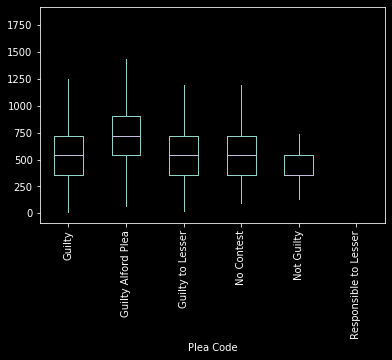

In [5]:
import matplotlib.pyplot as plt

ax = df[['Probation_in_Days', 'Plea_Code']].boxplot(grid=False, by='Plea_Code')
ax.set_title('')
plt.xticks(rotation=90)
ax.get_figure().suptitle('')
ax.set_xlabel('Plea Code')

In [6]:
df['Number_of_Charges'] = df.groupby(['Charged_Offense_Code', 'Filing_Date'])['File_Number_Sequence'].transform('count')

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

independent = ['Number_of_Charges']
dependent = 'Maximum_Sentence_Length_in_Days'

no_nan = df[[dependent, *independent]].dropna()
X = no_nan[independent]
y = no_nan[dependent]
reg.fit(X, y)
y_pred = reg.predict(X)
print("R^2:", reg.score(X, y))

R^2: 0.009329783515110492


In [8]:
reg.score(X, y)

0.009329783515110492

5         20.0
24        45.0
44        20.0
48        15.0
67         1.0
          ... 
423157    15.0
423158     6.0
423221    14.0
423289    14.0
423386    14.0
Name: Minimum_Sentence_Length, Length: 42034, dtype: float64

In [9]:
county_populations = pd.read_csv('./data/reference/nc_counties_population.csv', index_col='County')['2018_Population'].to_dict()

In [10]:
county_populations

{'ALAMANCE': 166436,
 'ALEXANDER': 37353,
 'ALLEGHANY': 11161,
 'ANSON': 24877,
 'ASHE': 27109,
 'AVERY': 17505,
 'BEAUFORT': 47079,
 'BERTIE': 19026,
 'BLADEN': 33190,
 'BRUNSWICK': 136744,
 'BUNCOMBE': 259103,
 'BURKE': 90382,
 'CABARRUS': 211342,
 'CALDWELL': 82029,
 'CAMDEN': 10710,
 'CARTERET': 69524,
 'CASWELL': 22698,
 'CATAWBA': 158652,
 'CHATHAM': 73139,
 'CHEROKEE': 28383,
 'CHOWAN': 14029,
 'CLAY': 11139,
 'CLEVELAND': 97645,
 'COLUMBUS': 55655,
 'CRAVEN': 102912,
 'CUMBERLAND': 332330,
 'CURRITUCK': 27072,
 'DARE': 36501,
 'DAVIDSON': 166614,
 'DAVIE': 42733,
 'DUPLIN': 58856,
 'DURHAM': 316739,
 'EDGECOMBE': 52005,
 'FORSYTH': 379099,
 'FRANKLIN': 67560,
 'GASTON': 222846,
 'GATES': 11573,
 'GRAHAM': 8484,
 'GRANVILLE': 60115,
 'GREENE': 21012,
 'GUILFORD': 533670,
 'HALIFAX': 50574,
 'HARNETT': 134214,
 'HAYWOOD': 61971,
 'HENDERSON': 116748,
 'HERTFORD': 23659,
 'HOKE': 54764,
 'HYDE': 5230,
 'IREDELL': 178435,
 'JACKSON': 43327,
 'JOHNSTON': 202675,
 'JONES': 9637,
 'LE

In [11]:
import numpy as np
def assign_county_population(county):
    try:
        return county_populations[county]
    except KeyError:
        return np.nan
df['County_Population'] = df['County'].apply(assign_county_population)

In [12]:
df[['County', 'County_Population']]

,County,County_Population
0,MECKLENBURG,1093901.0
1,JOHNSTON,202675.0
2,BRUNSWICK,136744.0
3,WAKE,1092305.0
4,CATAWBA,158652.0
...,...,...
424601,MACON,35285.0
424602,MECKLENBURG,1093901.0
424603,MECKLENBURG,1093901.0
424604,MECKLENBURG,1093901.0


0.011837170417450471


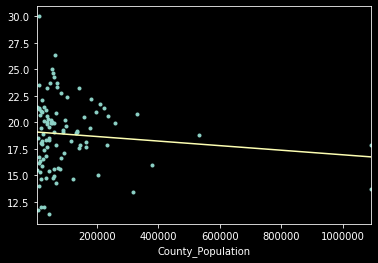

In [13]:
from sklearn.linear_model import LinearRegression

X = df[['File_Number_Sequence', 'County_Population', 'Probation_Length']].drop_duplicates().groupby('County_Population')['Probation_Length'].mean().index.values.reshape(-1, 1)
y = df[['File_Number_Sequence', 'County_Population', 'Probation_Length']].drop_duplicates().groupby('County_Population')['Probation_Length'].mean()
reg = LinearRegression()
reg.fit(X, y)

df[['File_Number_Sequence', 'County_Population', 'Probation_Length']].drop_duplicates().groupby('County_Population')['Probation_Length'].mean().plot(style='.')
plt.plot(X, reg.predict(X))
print(reg.score(X, y))

0.015362799611542965


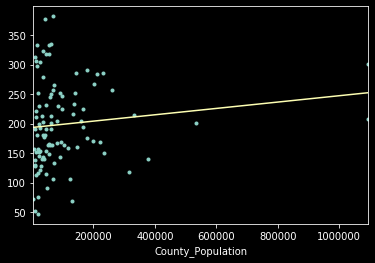

In [14]:
reg = LinearRegression()
X = df[['File_Number_Sequence', 'County_Population', 'Minimum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Minimum_Sentence_Length_in_Days'].mean().index.values.reshape(-1, 1)
y = df[['File_Number_Sequence', 'County_Population', 'Minimum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Minimum_Sentence_Length_in_Days'].mean()
reg.fit(X, y)

df[['File_Number_Sequence', 'County_Population', 'Minimum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Minimum_Sentence_Length_in_Days'].mean().plot(style='.')
plt.plot(X, reg.predict(X))
print(reg.score(X, y))

0.0004469565383293795


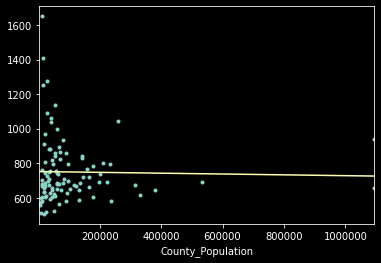

In [15]:
reg = LinearRegression()
X = df[['File_Number_Sequence', 'County_Population', 'Maximum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Maximum_Sentence_Length_in_Days'].mean().index.values.reshape(-1, 1)
y = df[['File_Number_Sequence', 'County_Population', 'Maximum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Maximum_Sentence_Length_in_Days'].mean()
reg.fit(X, y)

df[['File_Number_Sequence', 'County_Population', 'Maximum_Sentence_Length_in_Days']].drop_duplicates().groupby('County_Population')['Maximum_Sentence_Length_in_Days'].mean().plot(style='.')
plt.plot(X, reg.predict(X))
print(reg.score(X, y))

Score: 0.006613105180325097


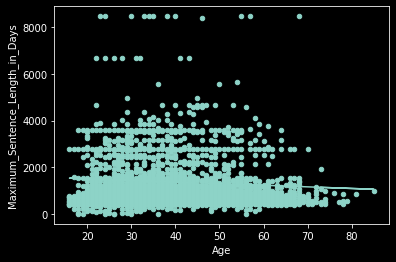

In [16]:
independent = 'Age'
dependent = 'Maximum_Sentence_Length_in_Days'

df[[independent, dependent]].drop_duplicates().plot.scatter(x=independent, y=dependent)
X = df[[independent, dependent]].drop_duplicates().dropna()[independent].values.reshape(-1,1)
y = df[[independent, dependent]].drop_duplicates().dropna()[dependent].values

reg = LinearRegression()
reg.fit(X, y)
plt.plot(X, reg.predict(X))
print("Score:", reg.score(X, y))

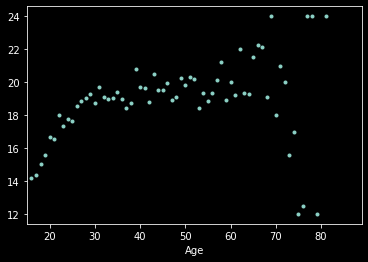

In [17]:
ax = df[['Age', 'Probation_Length']].groupby('Age')['Probation_Length'].mean().plot(style='.')

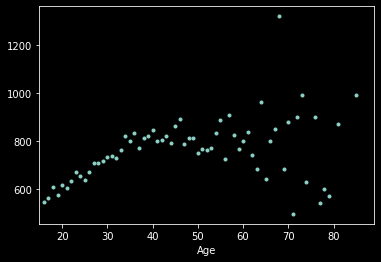

In [18]:
df[['Age', 'Maximum_Sentence_Length_in_Days']].groupby('Age')['Maximum_Sentence_Length_in_Days'].mean().plot(style='.')

Text(0, 0.5, 'Minimum Sentence Length (Days)')

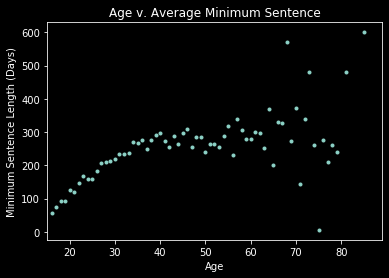

In [19]:

ax = df[['Age', 'Minimum_Sentence_Length_in_Days']].groupby('Age')['Minimum_Sentence_Length_in_Days'].mean().plot(style='.')
ax.set_title('Age v. Average Minimum Sentence')
ax.set_xlabel('Age')
ax.set_ylabel('Minimum Sentence Length (Days)')

Text(0, 0.5, 'Minimum Sentence Length (Days)')

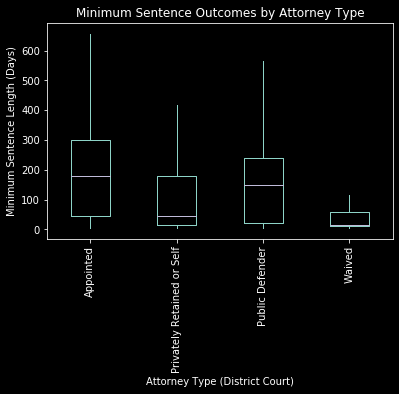

In [20]:
ax = df[['District_Court_Attorney_Type', 'Minimum_Sentence_Length_in_Days']].boxplot(grid=False, by='District_Court_Attorney_Type', showfliers=False)
ax.set_title('Minimum Sentence Outcomes by Attorney Type')
plt.xticks(rotation=90)
ax.get_figure().suptitle('')
ax.set_xlabel('Attorney Type (District Court)')
ax.set_ylabel('Minimum Sentence Length (Days)')

Text(0.5, 0, 'Attorney Type')

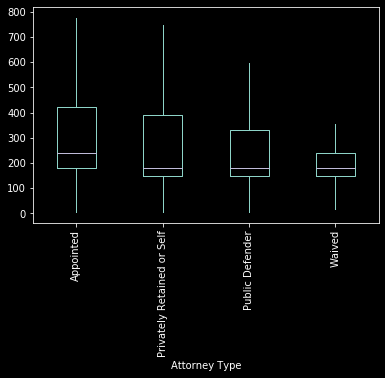

In [21]:
ax = df[['Superior_Court_Attorney_Type', 'Minimum_Sentence_Length_in_Days']].boxplot(grid=False, by='Superior_Court_Attorney_Type', showfliers=False)
ax.set_title('')
plt.xticks(rotation=90)
ax.get_figure().suptitle('')
ax.set_xlabel('Attorney Type')

In [22]:
df.drop_duplicates()

,Unnamed: 0,County_Number,File_Number_Sequence,Defendant_State_Address_Abbreviation,Defendant_Address_Zip_Code,Defendant_Date_of_Birth,Defendant_Race_Code,Defendant_Sex_Code,Filing_Date,Case_Trial_Date,...,Defendant_Race,Year,Age,Probation_in_Days,Minimum_Sentence_Length_in_Days,Maximum_Sentence_Length_in_Days,County_Population,County_Size_Square_Miles,County_Population_Square_Mile,Number_of_Charges
0,0,590.0,3719.0,NC,28227.0,1974-12-30,B,Male,2017-02-08,2017-04-07,...,Black,2017-01-01,42.0,360.0,NaN,NaN,1093901.0,523.84,2088.234957,107.0
1,1,500.0,705477.0,NC,28578.0,1993-09-08,B,Male,2014-05-12,2015-04-15,...,Black,2014-01-01,20.0,NaN,NaN,NaN,202675.0,791.30,256.129155,121.0
2,2,90.0,704325.0,NC,28314.0,1991-04-11,O,Male,2013-07-06,2014-01-27,...,Other,2013-01-01,22.0,NaN,NaN,NaN,136744.0,846.97,161.450819,86.0
3,3,910.0,221216.0,NC,27601.0,1997-09-15,B,Male,2014-09-12,2014-12-04,...,Black,2014-01-01,17.0,NaN,NaN,NaN,1092305.0,835.22,1307.805129,96.0
4,4,170.0,701763.0,NC,28806.0,1988-04-10,B,Female,2016-02-20,2016-04-13,...,Black,2016-01-01,27.0,NaN,NaN,NaN,158652.0,398.72,397.903291,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424601,424601,550.0,51006.0,NC,28734.0,1994-03-31,W,Male,2017-08-15,2018-02-26,...,White,2017-01-01,23.0,NaN,NaN,NaN,35285.0,449.57,78.486109,6.0
424602,424602,590.0,203903.0,NC,28269.0,1992-09-12,B,Male,2017-01-31,2018-02-15,...,Black,2017-01-01,24.0,NaN,NaN,NaN,1093901.0,523.84,2088.234957,11.0
424603,424603,590.0,245001.0,NC,28216.0,1955-08-05,B,Male,2017-12-01,2018-02-15,...,Black,2017-01-01,62.0,NaN,NaN,NaN,1093901.0,523.84,2088.234957,4.0
424604,424604,590.0,206223.0,NC,28052.0,1992-05-22,B,Male,2017-02-16,2018-02-15,...,Black,2017-01-01,24.0,NaN,NaN,NaN,1093901.0,523.84,2088.234957,8.0


In [23]:
df.groupby('Charged_Offense_Code')['File_Number_Sequence'].value_counts()

Charged_Offense_Code  File_Number_Sequence
3421.0                50416.0                 8
                      51807.0                 8
                      50710.0                 7
                      50184.0                 6
                      50365.0                 6
                                             ..
3568.0                250206.0                1
                      250210.0                1
                      250856.0                1
                      250975.0                1
                      251204.0                1
Name: File_Number_Sequence, Length: 195038, dtype: int64

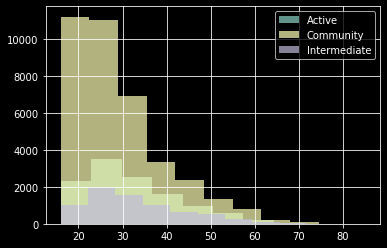

In [24]:
df.groupby('Active_Sentence_Indicator')['Age'].hist(alpha=0.7)
plt.legend(['Active', 'Community', 'Intermediate'])

In [25]:
df.groupby('Active_Sentence_Indicator')[['Probation_Length', 'Minimum_Sentence_Length_in_Days', 'Community_Service_Hours']].mean()

,Probation_Length,Minimum_Sentence_Length_in_Days,Community_Service_Hours
Active_Sentence_Indicator,,,
Active,NaN,385.305526,20.600000
Community,16.745876,100.382922,40.002938
Intermediate,25.634314,273.010572,48.225532


In [26]:
df[df['Active_Sentence_Indicator'] == 'Community']['Minimum_Sentence_Length_in_Days'].dropna()

5          20.0
24         45.0
44         20.0
79          3.0
87          7.0
          ...  
422835    180.0
422911    150.0
422943    180.0
422953    150.0
423157    450.0
Name: Minimum_Sentence_Length_in_Days, Length: 21853, dtype: float64

In [27]:
import statsmodels.api as sm
marijuana_offense_codes = pd.read_csv(
        './data/offense_codes/possession/marijuana.csv')['code']
cocaine_offense_codes = pd.read_csv('./data/offense_codes/possession/cocaine.csv')['code']
heroin_offense_codes = pd.read_csv('./data/offense_codes/possession/heroin.csv')['code']

counties = pd.unique(df['County'].dropna())
coefficients = pd.DataFrame()

for sentence_type, harshness_measure in (('Active', 'Minimum_Sentence_Length_in_Days'), ('Intermediate', 'Probation_in_Days'), ('Community', 'Community_Service_Hours')):
    for drug_name, offense_codes in (('Marijuana', marijuana_offense_codes), ('Cocaine', cocaine_offense_codes), ('Heroin', heroin_offense_codes)):
        if sentence_type == 'Community':
            _df = df[(df['Active_Sentence_Indicator'] == sentence_type) & (df['Charged_Offense_Code'].isin(offense_codes)) & (df['Minimum_Sentence_Length_in_Days'].isna())][[harshness_measure, 'Age', 'Defendant_Race', 'County', 'Plea_Code', 'District_Court_Attorney_Type', 'Defendant_Sex_Code']].dropna(axis=0)
        else:
            _df = df[(df['Active_Sentence_Indicator'] == sentence_type) & (df['Charged_Offense_Code'].isin(offense_codes))][[harshness_measure, 'Age', 'Defendant_Race', 'County', 'Plea_Code', 'District_Court_Attorney_Type', 'Defendant_Sex_Code']].dropna(axis=0)
        y = _df[harshness_measure]
        X = pd.concat([_df['Age'], *[pd.get_dummies(_df[var]) for var in ('Defendant_Race', 'County', 'Plea_Code', 'District_Court_Attorney_Type', 'Defendant_Sex_Code')]], axis=1)
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        summary = results.summary()

        results_html = summary.tables[1].as_html()
        coef_header = drug_name + '_' + sentence_type + '_coef'
        p_value_header = drug_name + '_' + sentence_type + '_p_value'
        series = pd.read_html(results_html, header=0, index_col=0)[0][['coef', 'P>|t|']].rename({'coef': coef_header, 'P>|t|': p_value_header}, axis=1)
        coefficients = pd.concat([coefficients, series], axis=1)

coefficients

/Users/jacklm/Documents/UNC/POLI 490H/poli490h/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/jacklm/Documents/UNC/POLI 490H/poli490h/venv/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/jacklm/Documents/UNC/POLI 490H/poli490h/venv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/jacklm/Documents/UNC/POLI 490H/poli490h/venv/lib/python3.7/site-packages/statsmodels/regression/linear_model.p

,Marijuana_Active_coef,Marijuana_Active_p_value,Cocaine_Active_coef,Cocaine_Active_p_value,Heroin_Active_coef,Heroin_Active_p_value,Marijuana_Intermediate_coef,Marijuana_Intermediate_p_value,Cocaine_Intermediate_coef,Cocaine_Intermediate_p_value,Heroin_Intermediate_coef,Heroin_Intermediate_p_value,Marijuana_Community_coef,Marijuana_Community_p_value,Cocaine_Community_coef,Cocaine_Community_p_value,Heroin_Community_coef,Heroin_Community_p_value
ALAMANCE,9.7664,0.021,41.0395,0.383,257.5412,0.091,10.7738,0.960,-159.1767,0.000,-51.3483,0.777,NaN,NaN,NaN,NaN,NaN,NaN
ALEXANDER,-5.3103,0.684,NaN,NaN,-41.4545,0.853,NaN,NaN,-20.5663,0.882,134.3279,0.457,NaN,NaN,NaN,NaN,NaN,NaN
ALLEGHANY,-6.1943,0.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANSON,3.3625,0.797,-91.6899,0.422,-139.7554,0.529,525.8403,0.014,50.7337,0.607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASHE,-5.1956,0.770,NaN,NaN,NaN,NaN,-545.8438,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Waived,-1.0135,0.303,35.3204,0.242,32.0291,0.558,17.5357,0.478,71.7058,0.000,137.6163,0.000,8.3346,0.101,NaN,NaN,NaN,NaN
White,2.1994,0.381,38.0826,0.410,-49.2131,0.457,33.2274,0.598,89.6641,0.018,56.1162,0.189,2.1921,0.666,-0.3161,NaN,8.394,NaN
YADKIN,-4.3316,0.666,-45.6221,0.710,-172.5440,0.516,NaN,NaN,-218.6616,0.018,-246.5567,0.200,NaN,NaN,NaN,NaN,NaN,NaN
YANCEY,168.7958,0.000,NaN,NaN,NaN,NaN,-138.9576,0.071,166.5669,0.396,84.7367,0.641,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
coefficients.to_csv('./data/county_regressions.csv')

100

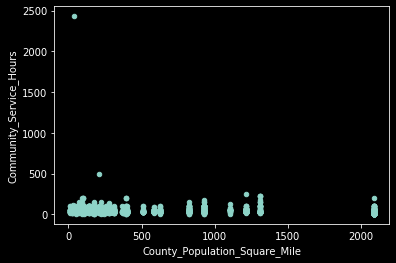

In [29]:
df[['County_Population_Square_Mile', 'Community_Service_Hours']].plot.scatter(x='County_Population_Square_Mile', y='Community_Service_Hours')

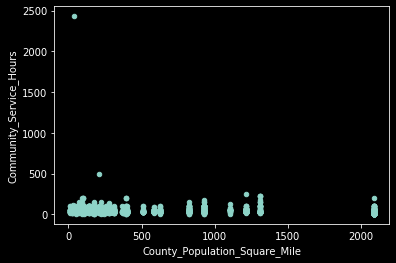

In [30]:
df[['County_Population_Square_Mile', 'Community_Service_Hours']].plot.scatter(x='County_Population_Square_Mile', y='Community_Service_Hours')

In [31]:
pd.to_datetime(df['Filing_Date'])

0        2017-02-08
1        2014-05-12
2        2013-07-06
3        2014-09-12
4        2016-02-20
            ...    
424601   2017-08-15
424602   2017-01-31
424603   2017-12-01
424604   2017-02-16
424605   2017-12-01
Name: Filing_Date, Length: 424606, dtype: datetime64[ns]

In [38]:
pd.get_dummies(df[['County', 'Defendant_Race', 'Plea_Code', 'District_Court_Attorney_Type']], prefix=None)

,County_ALAMANCE,County_ALEXANDER,County_ALLEGHANY,County_ANSON,County_ASHE,County_AVERY,County_BEAUFORT,County_BERTIE,County_BLADEN,County_BRUNSWICK,...,Plea_Code_Guilty,Plea_Code_Guilty Alford Plea,Plea_Code_Guilty to Lesser,Plea_Code_No Contest,Plea_Code_Not Guilty,Plea_Code_Responsible to Lesser,District_Court_Attorney_Type_Appointed,District_Court_Attorney_Type_Privately Retained or Self,District_Court_Attorney_Type_Public Defender,District_Court_Attorney_Type_Waived
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
424602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
424603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
424604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
